# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [6]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 
1. For PCA, the basis vector with the largest variance is the most principal (the one that explains more variance from the dataset). From the above result, we can see large variances in the Fresh and Milk columns. I think these two features might show up in the first PCA dimensions.
2. For ICA, the resultant vectors are statistically independent. The given columns do not seem to be related to each other, so they all may be included.

###PCA

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


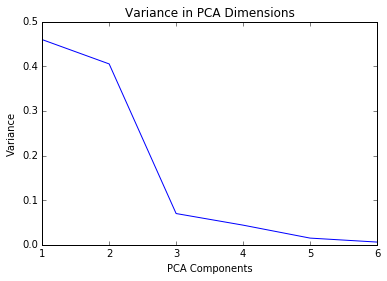

In [7]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print data.columns.values.tolist()
print pca.components_
print '\n'
print pca.explained_variance_ratio_

# Plot to see variance
plt.figure()
plt.plot(np.arange(1,7),pca.explained_variance_ratio_)
plt.xlabel("PCA Components")
plt.ylabel("Variance")
plt.title("Variance in PCA Dimensions")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
The variance quickly drops off from the second to third dimension after which it drops off very slowly. Since most of the variance is explained by the first two dimensions, I think they should be sufficient for analysis. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The Fresh is very significant in the first dimension and the lesser significant ones in it are the Frozen and Milk. The Grocery, Milk and Detergents-Paper are significant in the second dimension. Third dimension onwards there is not much variance observed. Since the first two dimensions could represent the variation in data (the customer behavior), we can use them for visualization in the form of 2 dimensional plots for explaining our analysis to the grocery distributors.   

###ICA

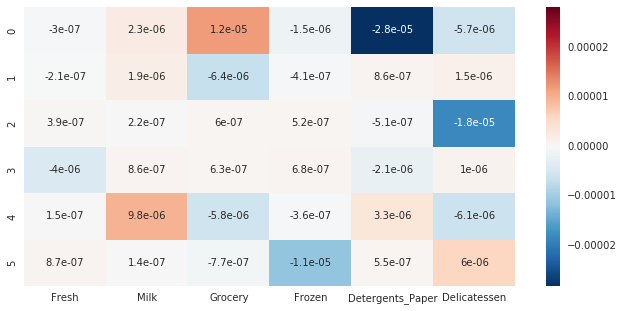

In [15]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
import seaborn as sns

centered_data = data - data.mean()
#print centered_data
#print centered_data.head()

ica = FastICA(n_components=6)
ica.fit(centered_data)

plt.figure(figsize = (11,5))
sns.heatmap(pd.DataFrame(ica.components_,
                         columns = list(data.columns)),annot = True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
1. The first component consists of Fresh and Delicatessen.
2. The second component consists of Grocery and Detergents_Paper in addition to Fresh and Delicatessen.
3. The third component consists of Fresh, Milk, Grocery and Frozen.
4. The fourth component consists of Grocery, Frozen and Detergents_Paper.
5. The fifth component consists of Milk, Grocery and Delicatessen.
6. The sixth component consists of Grocery and Detergents_Paper.

ICA helps us understand the independent components which in this case could be the different combinations in which the customers are buying the items from the grocery store.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:
Advantages of K Means:
1. Simple, relatively faster method which is easier to understand.
2. Performs "Hard" assignments - points belong to exactly one group.

Advantages of Gaussian Mixture Models:
1. Works even with points that are not so well separated.
2. Performs "Soft" assignment - it tells us about how likely a it is for a point to belong to a certain cluster.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [17]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [18]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(centered_data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [19]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters_k = KMeans(n_clusters = 2).fit(reduced_data)
clusters_k3 = KMeans(n_clusters = 3).fit(reduced_data)
print "K Means:"
print clusters_k
print clusters_k3
clusters = GMM(n_components=2).fit(reduced_data)
clusters_g3 = GMM(n_components=3).fit(reduced_data)
print "GMM:"
print clusters
print clusters_g3

K Means:
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
GMM:
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [20]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z_k = clusters_k.predict(np.c_[xx.ravel(), yy.ravel()])
Z_k3 = clusters_k3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_g3 = clusters_g3.predict(np.c_[xx.ravel(), yy.ravel()])

In [24]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids_k = clusters_k.cluster_centers_
centroids_k3 = clusters_k3.cluster_centers_
print "K Means Centroids:"
print centroids_k
print centroids_k3
centroids = clusters.means_
centroids_g3 = clusters_g3.means_
print "GMM Cluster Means:"
print centroids
print centroids_g3

K Means Centroids:
[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]
[[-24220.71188261  -4364.45560022]
 [  4114.95375632  -3081.03219608]
 [  1339.44615464  25546.49074629]]
GMM Cluster Means:
[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]
[[  6987.95079141   4249.82914044]
 [   269.05318679  -6506.88683442]
 [-17879.18623839  10122.79246625]]


Using Two Clusters:


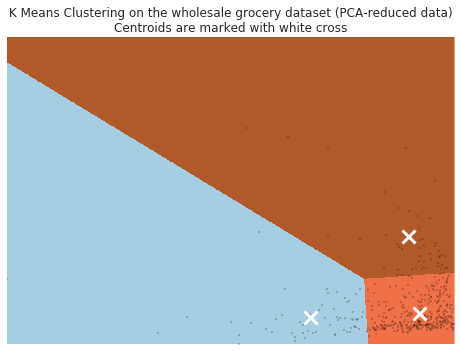

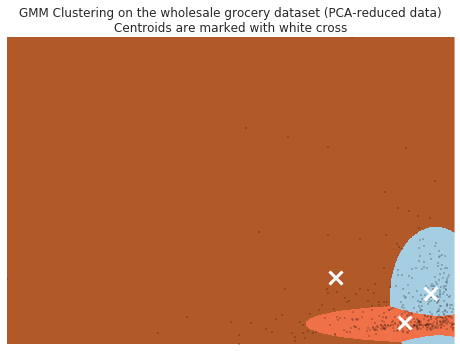

Using Three Clusters:


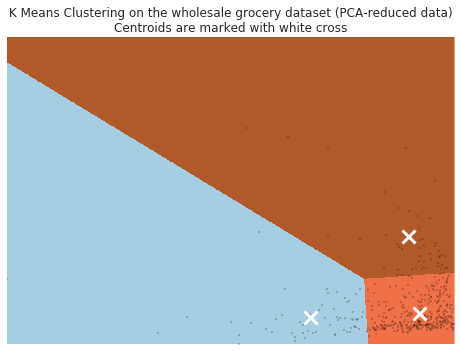

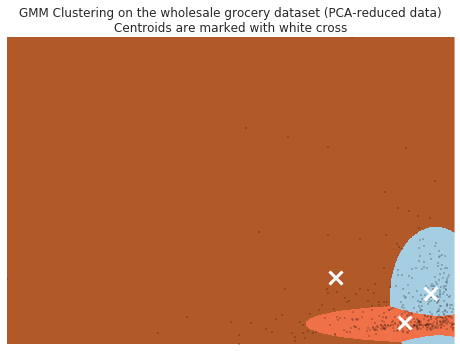

In [35]:
# Put the result into a color plot

three = 0
print "Using Two Clusters:"
while three < 2:
# K Means
    Z_k = Z_k.reshape(xx.shape)
    if three:
        print "Using Three Clusters:"
        Z_k = Z_k3.reshape(xx.shape)
        centroids_k = centroids_k3
    plt.figure(1)
    plt.clf()
    plt.imshow(Z_k, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids_k[:, 0], centroids_k[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K Means Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    # GMM

    Z = Z.reshape(xx.shape)
    if three:
        Z = Z_g3.reshape(xx.shape)
        centroids = centroids_g3
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('GMM Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    three = three + 1
pass

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
The customers have now been classified into two different categories, the small family run shops which are represented as closely grouped points in the bottom right of the graph (points having low variation) and the large volume customers (points having large variation).These represent the two different segments of customers. The white cross represents the mean customer for each segment. Since the family run shops represent a significant population of customers, the delivery of products in evening could cause problems. 

When we increased the number of clusters, both K Means and GMM could not segment the customers into separate segments that are meaningful. This could be explained by the result of PCA which showed that most of the variance was explained by the first two dimensions. Therefore, it seems more appropriate to classify customers into two segments instead of three or more. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
The best results were obtained from using PCA along with GMM. PCA helped us reduce the dimensions of data to two principle components which best explained the variance in data. We could use this for visualization. Comparing GMM to K Means, GMM gave better insight because it could group the customers into proper segments (small family run shops- the points with low variations and the large volume group- the points with more variations).

**9)** How would you use that technique to help the company design new experiments?

Answer: 
The grocery distributor can now use these groups to perform different experiments within the groups. They can also run A/B Tests to determine how an experiment affects each group. After introducing new products, they can also cluster these clusters to find out how the new product was received by the segments. 

**10)** How would you use that data to help you predict future customer needs?

Answer: 
The customers can now be grouped into two different segments. We can help the grocery distributor by classifying new customers to one of these segments and provide them services that are more suitable as per their needs. For example, the distributor can run the cheaper evening delivery only for the large volume customers whereas the normal delivery option for the small family run shops. Whenever the distributor wants to provide delivery to a new customer, we can classify the new customer into one of these segments and provide the best suitable type of delivery to him. 

##References:
1. PCA - http://www.di.fc.ul.pt/~jpn/r/pca/pca.html
2. ICA - http://research.ics.aalto.fi/ica/icademo/